## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from image_crop import image_crop
from label_Recognizer import label_Recognizer


## Images Pre-Processing 
### Processing from image Folder, then saving them in another folder named : 'cropped'


100%|██████████| 24/24 [28:15<00:00, 70.66s/it]


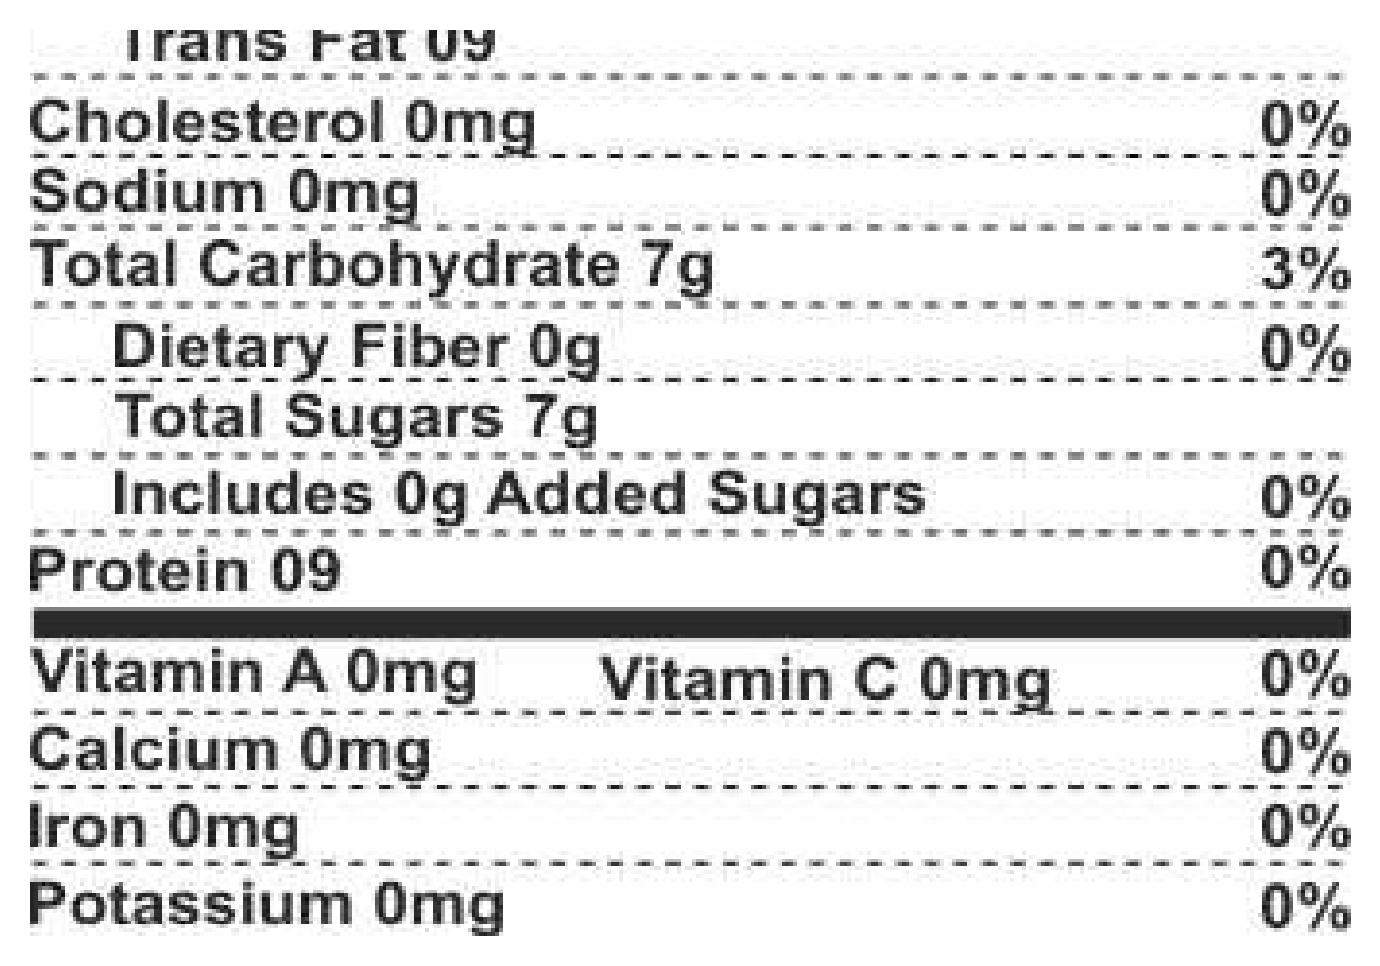

In [4]:
# Passing images folder path to the function image_crop
# This process takes the original image and apply segmentation and filteration
# Then, detect boxes within the image and crop them into a new folder
image_crop('img/*.jpg')

### Applicatopn of OCR on cropped images saved at 'cropped'

In [2]:
# Passing the path of cropped images to the function laber_recognizer
# This process reads the text in the cropped images 
# Then, a post image process takes place to extract nutrition information 
dic_output = label_Recognizer('./cropped/')

In [8]:
# Creating a dataframe using the output dictionary created by the label_recognizer model
df_nutrition = pd.DataFrame(dic_output)
# Setting 'product_id' as the indext and drop all columns that has no value
df_nutrition = df_nutrition.set_index(keys='product_id').dropna(how='all')
# replace field that's entirely space (or empty) with NA
df_nutrition = df_nutrition.replace('', 'NA')
df_nutrition

,Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Sodium,Total Carbohydrate,Sugars,Cholesterol,Dietary Fiber,Polyunsaturated Fat,Monounsaturated Fat,Potassium,Protein
product_id,,,,,,,,,,,,,,
p1.jpg,22,100,NA,NA,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p10.jpg,100,4,1,1,NaN,1874,10,5,NaN,NaN,NaN,NaN,NaN,NaN
p2.jpg,NaN,NaN,NaN,0,NaN,4,5,0,0,2.5,NaN,NaN,NaN,NaN
p3.jpg,25,27.,1.0,0.0,NaN,54.0,1.0,0.0,20.0,0.0,0.0,1.0,22.0,2.0
p4.jpg,NaN,1,0,0,NaN,870,3,NaN,0,NaN,NaN,NaN,NaN,NaN
p5.jpg,5,67,1,NaN,NaN,48,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p6.jpg,NaN,1,0,0,NaN,870,3,NaN,0,NaN,NaN,NaN,NaN,NaN
p7.jpg,1,1,0,0,0,610,2,NaN,0,0,NaN,NaN,NaN,NaN
p8.jpg,1,1,0,NaN,0,610,2,0,NaN,0,NaN,NaN,0,0


In [9]:
df_nutrition = df_nutrition.fillna('NA')

In [10]:
df_nutrition

,Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Sodium,Total Carbohydrate,Sugars,Cholesterol,Dietary Fiber,Polyunsaturated Fat,Monounsaturated Fat,Potassium,Protein
product_id,,,,,,,,,,,,,,
p1.jpg,22,100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
p10.jpg,100,4,1,1,NA,1874,10,5,NA,NA,NA,NA,NA,NA
p2.jpg,NA,NA,NA,0,NA,4,5,0,0,2.5,NA,NA,NA,NA
p3.jpg,25,27.,1.0,0.0,NA,54.0,1.0,0.0,20.0,0.0,0.0,1.0,22.0,2.0
p4.jpg,NA,1,0,0,NA,870,3,NA,0,NA,NA,NA,NA,NA
p5.jpg,5,67,1,NA,NA,48,11,NA,NA,NA,NA,NA,NA,NA
p6.jpg,NA,1,0,0,NA,870,3,NA,0,NA,NA,NA,NA,NA
p7.jpg,1,1,0,0,0,610,2,NA,0,0,NA,NA,NA,NA
p8.jpg,1,1,0,NA,0,610,2,0,NA,0,NA,NA,0,0


In [13]:
import plotly
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = df_nutrition.loc['p10.jpg','Sugars'],
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Sugars", 'font': {'size': 20}},
    delta = {'reference': 150, 'increasing': {'color': "gray"}},
    gauge = {
        'axis': {'range': [None, 150], 'tickwidth': 2},
        'bar': {'color': "black"},
        'bgcolor': "white",
        'borderwidth': 1,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 30], 'color': 'green'},
            {'range': [30, 80], 'color': 'orange'},
            {'range': [80, 150], 'color': 'red'}],
       'threshold': {
             'line': {'color': "white", 'width': 10},
             'thickness': 0.25,
             'value': 150}}))

fig.show()

ModuleNotFoundError: No module named 'plotly'